# Twitter Sentiment Analysis

## Loading Libraries and Data

In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv",encoding = 'latin')
test = pd.read_csv("test.csv",encoding = 'latin')

Let's read train and test datasets.

In [3]:
combi = train.append(test, ignore_index=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Text PreProcessing and Cleaning

### Data Inspection

Let's check out a few non racist/sexist tweets.

In [4]:
train[train['Target'] == 0].head(10)

,Id,text,Target
3,4,@AmericanAir Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??,0
8,9,YO! @InternJohnRadio @mrerickv give @SouthwestAir their plane back. They're mad &amp; threatening to take away my Companion Pass. #Luv,0
12,13,@United lounge @ #Heathrow Used by @AirNZUSA http://t.co/6hJucP694l,0
17,18,@AmericanAir yes they do http://t.co/wCSAZZQPae,0
21,22,@JetBlue what's good with a Miami terminal?,0
22,23,"@SouthwestAir got an email confirmation of wifi purchase on a recent flight. Trouble is, I've never flown with you. Ever. #concerned #scam?",0
27,28,@AmericanAir follow me back so I can DM you guys,0
34,35,@AmericanAir what about flight 1239?,0
36,37,@JetBlue imma need the hook up tho,0
43,44,@AmericanAir is 2513 and 1555 on time or Cancelled Flightled?,0


<br>
Now check out a few racist/sexist tweets.

In [5]:
train[train['Target'] == 1].head(10)

,Id,text,Target
19,20,@JetBlue thanks for letting us know. Hoping for no more delays!,1
32,33,"@AmericanAir yes yes yes,so glad to be headed home!",1
46,47,@JetBlue credit to you for replying. IÂÃÂªll look forward to hopefully one of those 103 on my flight home tonight :),1
53,54,@JetBlue - looking forward to it when we finally take off.,1
64,65,@united thnx for the info,1
69,70,@SouthwestAir I was just sitting here talking at a tech conference about how awesome you guys are and this rolled across. Luv you guys! #LOL,1
80,81,@SouthwestAir no worries. You're doing the best u can. Already Cancelled Flighted my biz trip. Still $LUV you! -RR 1079871763,1
86,87,@SouthwestAir Thank you thank you thank you,1
94,95,@JetBlue @Airbus Wow what an amazing video https://t.co/dbcvEPn5QC Great world Guys #Bluemanity #CoreValues #Passion #AeroJobMarket,1
99,100,@VirginAmerica Flying LAX to SFO and after looking at the awesome movie lineup I actually wish I was on a long haul.,1


Let's check dimensions of the train and test dataset.

In [6]:
train.shape, test.shape

((7320, 3), (7320, 2))

Train set has 31,962 tweets and test set has 17,197 tweets.

Let's have a glimpse at label-distribution in the train dataset.

In [7]:
train["Target"].value_counts()

-1    4566
 0    1536
 1    1218
Name: Target, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

<br>
Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

The tweet-length distribution is more or less the same in both train and test data.


### Data Cleaning

In [8]:
combi = train.append(test, ignore_index=True)
combi.shape

(14640, 4)

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

__1. Removing Twitter Handles (@user)__

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head()

,Id,Target,id,text,tidy_tweet
0,1.0,-1.0,NaN,@USAirways ! THE WORST in customer service. @USAirways ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer,! THE WORST in customer service. ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer
1,2.0,-1.0,NaN,@united call wait times are over 20 minutes and airport wait times are longer,call wait times are over 20 minutes and airport wait times are longer
2,3.0,-1.0,NaN,@JetBlue what's up with the random delay on flight 1729? Any chance of it being a false alarm?,what's up with the random delay on flight 1729? Any chance of it being a false alarm?
3,4.0,0.0,NaN,@AmericanAir Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??,Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??
4,5.0,-1.0,NaN,"@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.","UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably."


__2. Removing Punctuations, Numbers, and Special Characters__

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,Id,Target,id,text,tidy_tweet
0,1.0,-1.0,NaN,@USAirways ! THE WORST in customer service. @USAirways ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer,THE WORST in customer service Calling for over a month to book a flight #poorcustomerservice #usairwaysfflyer
1,2.0,-1.0,NaN,@united call wait times are over 20 minutes and airport wait times are longer,call wait times are over minutes and airport wait times are longer
2,3.0,-1.0,NaN,@JetBlue what's up with the random delay on flight 1729? Any chance of it being a false alarm?,what s up with the random delay on flight Any chance of it being a false alarm
3,4.0,0.0,NaN,@AmericanAir Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??,Good morning Wondering why my pre TSA check was not on my boarding pass this morning
4,5.0,-1.0,NaN,"@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.",UA Pacific Rim and Date Night cut out Not constantly or randomly but one spot repeatably
5,6.0,-1.0,NaN,@SouthwestAir it was not - still don't know where skis are and cannot get a call back from bag svc at airport (left several msgs),it was not still don t know where skis are and cannot get a call back from bag svc at airport left several msgs
6,7.0,-1.0,NaN,"@united See? We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr. After we boarded, there was a defibrillator issue.",See We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr After we boarded there was a defibrillator issue
7,8.0,-1.0,NaN,"@SouthwestAir Flt 463 San Jose, CA -&gt; Denver, CO. Delayed 2 hrs but easily best flight + touchdown in all my years flying. Keep it up!",Flt San Jose CA gt Denver CO Delayed hrs but easily best flight touchdown in all my years flying Keep it up
8,9.0,0.0,NaN,YO! @InternJohnRadio @mrerickv give @SouthwestAir their plane back. They're mad &amp; threatening to take away my Companion Pass. #Luv,YO give their plane back They re mad amp threatening to take away my Companion Pass #Luv
9,10.0,-1.0,NaN,@AmericanAir Somehow between DFW and MIA I got bumped from 12B all the way to 41G on 2312? What's up with that?,Somehow between DFW and MIA I got bumped from B all the way to G on What s up with that


In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace('#','')
combi.head(10)

,Id,Target,id,text,tidy_tweet
0,1.0,-1.0,NaN,@USAirways ! THE WORST in customer service. @USAirways ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer,THE WORST in customer service Calling for over a month to book a flight poorcustomerservice usairwaysfflyer
1,2.0,-1.0,NaN,@united call wait times are over 20 minutes and airport wait times are longer,call wait times are over minutes and airport wait times are longer
2,3.0,-1.0,NaN,@JetBlue what's up with the random delay on flight 1729? Any chance of it being a false alarm?,what s up with the random delay on flight Any chance of it being a false alarm
3,4.0,0.0,NaN,@AmericanAir Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??,Good morning Wondering why my pre TSA check was not on my boarding pass this morning
4,5.0,-1.0,NaN,"@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.",UA Pacific Rim and Date Night cut out Not constantly or randomly but one spot repeatably
5,6.0,-1.0,NaN,@SouthwestAir it was not - still don't know where skis are and cannot get a call back from bag svc at airport (left several msgs),it was not still don t know where skis are and cannot get a call back from bag svc at airport left several msgs
6,7.0,-1.0,NaN,"@united See? We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr. After we boarded, there was a defibrillator issue.",See We were told repeatedly that the pilot was Late Flight and kept getting Late Flightr After we boarded there was a defibrillator issue
7,8.0,-1.0,NaN,"@SouthwestAir Flt 463 San Jose, CA -&gt; Denver, CO. Delayed 2 hrs but easily best flight + touchdown in all my years flying. Keep it up!",Flt San Jose CA gt Denver CO Delayed hrs but easily best flight touchdown in all my years flying Keep it up
8,9.0,0.0,NaN,YO! @InternJohnRadio @mrerickv give @SouthwestAir their plane back. They're mad &amp; threatening to take away my Companion Pass. #Luv,YO give their plane back They re mad amp threatening to take away my Companion Pass Luv
9,10.0,-1.0,NaN,@AmericanAir Somehow between DFW and MIA I got bumped from 12B all the way to 41G on 2312? What's up with that?,Somehow between DFW and MIA I got bumped from B all the way to G on What s up with that


__3. Removing Short Words__

In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

Let’s take another look at the first few rows of the combined dataframe.

In [14]:
combi.head()

,Id,Target,id,text,tidy_tweet
0,1.0,-1.0,NaN,@USAirways ! THE WORST in customer service. @USAirways ! Calling for over a month to book a flight! #poorcustomerservice #usairwaysfflyer,THE WORST customer service Calling for over month book flight poorcustomerservice usairwaysfflyer
1,2.0,-1.0,NaN,@united call wait times are over 20 minutes and airport wait times are longer,call wait times are over minutes and airport wait times are longer
2,3.0,-1.0,NaN,@JetBlue what's up with the random delay on flight 1729? Any chance of it being a false alarm?,what with the random delay flight Any chance being false alarm
3,4.0,0.0,NaN,@AmericanAir Good morning! Wondering why my pre-TSA check was not on my boarding pass this morning??,Good morning Wondering why pre TSA check was not boarding pass this morning
4,5.0,-1.0,NaN,"@united UA 746. Pacific Rim and Date Night cut out. Not constantly or randomly, but one spot, repeatably.",Pacific Rim and Date Night cut out Not constantly randomly but one spot repeatably


__4. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [15]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [16]:
tokenized_tweet.head()

0    [THE, WORST, customer, service, Calling, for, over, month, book, flight, poorcustomerservice, usairwaysfflyer]
1                                   [call, wait, times, are, over, minutes, and, airport, wait, times, are, longer]
2                                        [what, with, the, random, delay, flight, Any, chance, being, false, alarm]
3                         [Good, morning, Wondering, why, pre, TSA, check, was, not, boarding, pass, this, morning]
4                 [Pacific, Rim, and, Date, Night, cut, out, Not, constantly, randomly, but, one, spot, repeatably]
Name: tidy_tweet, dtype: object

In [17]:
len(tokenized_tweet)

14640

Now we can normalize the tokenized tweets.

In [18]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [19]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # stemming
#lemmatized_output = ' '.join([lemmatizer.lemmatize(token) for token in tokens])

0                                            [the, worst, custom, servic, call, for, over, month, book, flight, poorcustomerservic, usairwaysffly]
1                                                                      [call, wait, time, are, over, minut, and, airport, wait, time, are, longer]
2                                                                            [what, with, the, random, delay, flight, ani, chanc, be, fals, alarm]
3                                                                       [good, morn, wonder, whi, pre, tsa, check, wa, not, board, pas, thi, morn]
4                                                      [pacif, rim, and, date, night, cut, out, not, constantli, randomli, but, one, spot, repeat]
5                            [wa, not, still, don, know, where, ski, are, and, cannot, get, call, back, from, bag, svc, airport, left, sever, msg]
6        [see, were, told, repeatedli, that, the, pilot, wa, late, flight, and, kept, get, late, flightr, after, board

Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet

## Story Generation and Visualization from Tweets

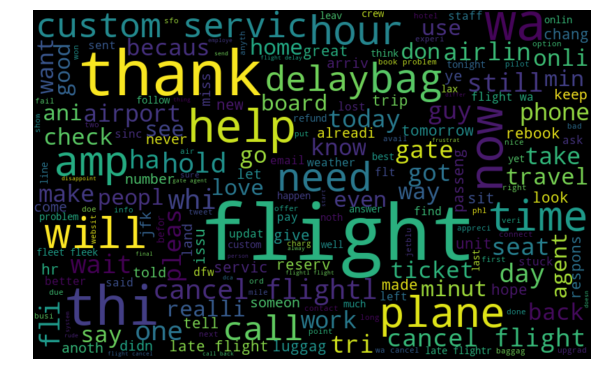

In [21]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

__B) Words in non racist/sexist tweets__

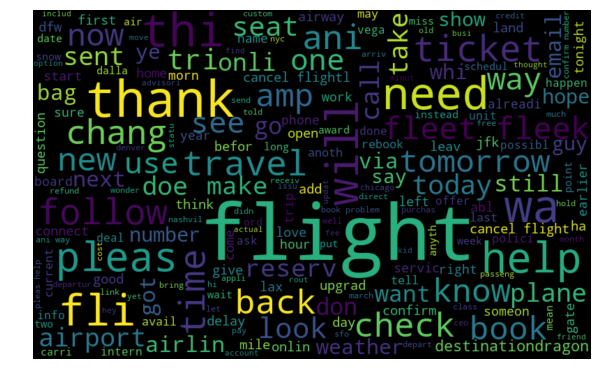

In [22]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['Target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

__C) Racist/Sexist Tweets__

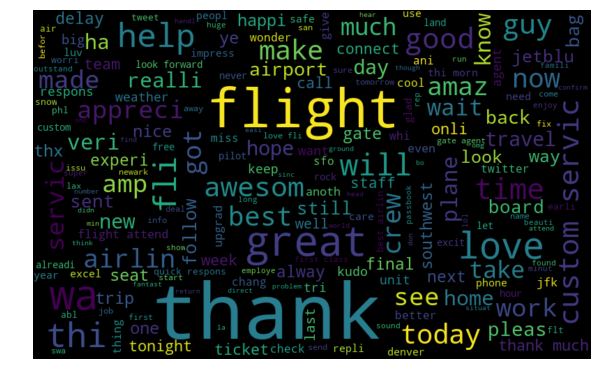

In [23]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['Target'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

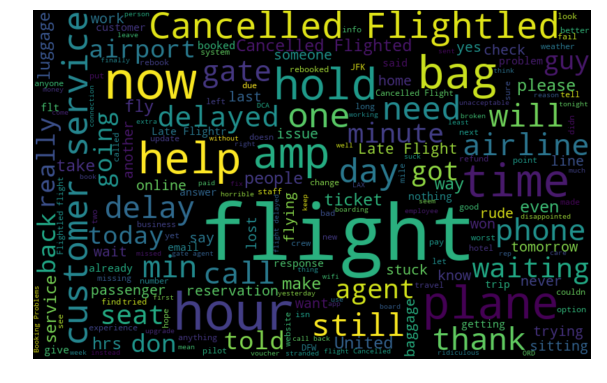

In [882]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['Target'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

## Extracting Features from Cleaned Tweets

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

### Bag-of-Words Features

In [25]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=500, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(14640, 500)

### TF-IDF Features

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(14640, 1000)

---

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF. We will use the following algorithms to build models:

1. Logistic Regression
2. Naive Bayes
3. XGBoost

### 1. Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Bag-of-Words Features

In [28]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(train['Target']))



Using TensorFlow backend.


Original dataset shape Counter({-1: 4566, 0: 1536, 1: 1218})


In [30]:
train_bow = bow[:7320,:]
test_bow = bow[7320:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Target'],  
                                                          random_state=42, 
                                                          test_size=0.15)

In [32]:
lreg = LogisticRegression(random_state = 10)
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict(xvalid_bow) # predicting on the validation set

prediction_int = prediction.astype(np.int)

f1_score(yvalid, prediction,average = 'macro') # calculating f1 score

0.7133946676174338

Now let's make predictions for the test dataset and create a submission file.

In [33]:
test_pred = lreg.predict(test_bow)

test_pred_int = test_pred.astype(np.int)
test['Target'] = test_pred_int
submission = test[['id','Target']]
submission.to_csv('lreg_bow_8.csv', index=False) # writing data to a CSV file

#### TF-IDF Features

In [34]:
train_tfidf = tfidf[:7320,:]
test_tfidf = tfidf[7320:,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['Target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [35]:
lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict(xvalid_tfidf)
#prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction.astype(np.int)

f1_score(yvalid, prediction_int, average = 'macro')

0.6929280264877032

In [ ]:
Now let's make predictions for the test dataset and create a submission file.

In [ ]:
test_pred = lreg.predict(test_bow)
#test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred.astype(np.int)
test['Target'] = test_pred_int
submission = test[['id','Target']]
submission.to_csv('lreg_tfidf.csv', index=False) # writing data to a CSV file

# Naive Bayes

# Bag of words

In [37]:
train_bow = bow[:7320,:]
test_bow = bow[7320:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_bow.todense(), ytrain)
prediction = gnb.predict(xvalid_bow.todense())
prediction_int = prediction.astype(np.int)
f1_score(yvalid, prediction_int, average = 'macro')

0.4236061416892243

# tfidf  

In [39]:
train_tfidf = tfidf[:7320,:]
test_tfidf = tfidf[7320:,:]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train['Target'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_tfidf.todense(), ytrain)
prediction = gnb.predict(xvalid_tfidf.todense())
prediction_int = prediction.astype(np.int)
f1_score(yvalid, prediction_int, average = 'macro')

0.41579172584840923

### 3. XGBoost

In [41]:
from xgboost import XGBClassifier

In [42]:
train_bow = bow[:7320,:]
test_bow = bow[7320:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['Target'],  
                                                          random_state=42, 
                                                          test_size=0.2)

#### Bag-of-Words Features

In [43]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=100).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction, average = 'macro')

0.7008908400678452

In [44]:
test_pred = xgb_model.predict(test_bow)
test['Target'] = test_pred
submission = test[['id','Target']]
submission.to_csv('xgb_bow_1.csv', index=False)

#### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction, average = 'macro')